# Gender Detection

In [1]:
import time
start_time = time.time()
import progressbar
import os
import numpy as np
from keras.preprocessing import image
import cv2
import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys

Using TensorFlow backend.


In [2]:
from keras.preprocessing import image
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

# Data Preprocessing

In [3]:
import sklearn
print('sklearn: %s' %sklearn.__version__)

sklearn: 0.22.1


In [4]:
# Loading the data file
# data = load_iris()
# df=pd.DataFrame(data.data,columns=data.feature_names)
# print(df.head())

# Drop rest of the features and extract the target values
# Y = data.target
# X = data.data[:, :2]

# Shuffle and split the data into training and test set
# X, Y = shuffle(X,Y)
# x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

In [5]:
# def SVM(x_train,y_train, x_test):
#     #model = ...
#     model = SVC(kernel = 'linear')
#     model.fit(x_train,y_train)
#     #model.  #fit using x_train and y_train
#     y_pred = model.predict(x_test)
#     return y_pred
# # Scikit learn library results
# y_pred=SVM(x_train,y_train, x_test)
# print(accuracy_score(y_test,y_pred))


In [6]:
import landmarks as l2

In [7]:
def get_data():
    return l2.extract_features_labels()
    
def split_data(X, Y):
#     split = 4000
        
#     tr_X = X[:split]
#     tr_Y = Y[:split]
#     te_X = X[split:]
#     te_Y = Y[split:]

    X, Y = shuffle(X,Y)
    tr_X, te_X, tr_Y, te_Y = train_test_split(X, Y, train_size=0.7)
    
    return tr_X, tr_Y, te_X, te_Y
        
#     for i in [tr_X, tr_Y, te_X, te_Y]:
#         print(i.shape)
    
#     return tr_X, tr_Y, te_X, te_Y
    
# get_data()


# def train_validate_test_split(l2, train_set=0.6, validate_set=0.1, seed=None):
#     np.random.seed(seed)
#     np.random.seed(0)
#     pmt = np.random.permutation(l2.extract_features_labels())
#     k = len(l2.extract_features_labels())
#     training = int(train_set * k)
#     validating = int(validate_set * k) + training
#     train = l2.iloc[pmt[:training]]
#     validate = l2.iloc[pmt[training:validating]]
#     test = l2.iloc[pmt[validating:]]
#     return train, validate, test

In [8]:
X,y = get_data()

print(X.shape)
print(y.shape)

(4798, 68, 2)
(4798,)


In [9]:
# print (os.path.abspath(os.curdir))
# # sklearn functions implementation
# def img_SVM(training_images, training_labels, test_images, test_labels):
#     #classifier = ...
#     classifier = SVC(kernel = 'rbf')
#     classifier.fit(training_images, training_labels)
#     pred = classifier.predict(test_images)
#     print("Accuracy:", accuracy_score(test_labels, pred))

#     print(pred)
#     return pred



In [10]:
Y = np.array([y, -(y - 1)]).T

tr_X, tr_Y, te_X, te_Y = split_data(X, Y)

In [11]:
# print(tr_X)
# print(tr_X.shape)
# print(tr_Y)
# print(tr_Y.shape)

In [12]:
# def totuple(a):
#     return list(zip(*tr_Y))[0]

# # pred=img_SVM(tr_X.reshape((3500, 2500*2)), list(zip(*tr_Y))[0], te_X.reshape((3500, 2500*2)), list(zip(*te_Y))[0])
# # pred=img_SVM(tr_X.reshape((len(tr_X), 68*2)), totuple(tr_Y), te_X.reshape((len(te_X), 68*2)), totuple(te_Y))
# # pred
# pred=img_SVM(
#     tr_X.reshape(tr_X.shape[0], tr_X.shape[1]*tr_X.shape[2]),
#     totuple(tr_Y), 
#     te_X.reshape((te_X.shape[0], te_X.shape[1]*te_X.shape[2])), 
#     totuple(te_Y)
# )
# # tr_X.shape

def reshapeX(X):
    return X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

def reshapeY(y):
    return list(zip(*y))[0]

tr_X = reshapeX(tr_X)
te_X = reshapeX(te_X)
tr_Y = reshapeY(tr_Y)
te_Y = reshapeY(te_Y)

In [13]:
print(tr_X.shape)
# print(Y)

(3358, 136)


In [14]:
# from sklearn.model_selection import GridSearchCV

In [15]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
#rbf is for gaussian
# SVM regularization parameter

svc_list = []

gamma = 'scale'

# C is the element, i.e. 0.1 and 1
for C in [0.1,1]:
    for degree in [1, 2, 3, 4]:
# for i in range(0.1,1,0.1)

# for i in range(len(C_loop)): # C is the index, i.e. 0 and 1
#     print(i, C_loop[i])
        lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
        print(C, "Linear:", lin_svc.score(te_X, te_Y))

        rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(tr_X, tr_Y)
        print( C, gamma, "Rbf:", rbf_svc.score(te_X, te_Y))

        poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(tr_X, tr_Y)
        print( C, degree, "Poly", poly_svc.score(te_X, te_Y))

        svc_list.append({
            'lin_svc': lin_svc,
            'rbf_svc': rbf_svc,
            'poly_svc': poly_svc,
            'C': C,
            'gamma': gamma,
            'degree': degree
        })

# lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
# print(C, "Linear:", lin_svc.score(te_X, te_Y))

0.1 Linear: 0.9152777777777777
0.1 scale Rbf: 0.5180555555555556
0.1 1 Poly 0.5125
0.1 Linear: 0.9152777777777777
0.1 scale Rbf: 0.5180555555555556
0.1 2 Poly 0.8625
0.1 Linear: 0.9152777777777777
0.1 scale Rbf: 0.5180555555555556
0.1 3 Poly 0.9104166666666667
0.1 Linear: 0.9152777777777777
0.1 scale Rbf: 0.5180555555555556
0.1 4 Poly 0.9138888888888889
1 Linear: 0.9159722222222222
1 scale Rbf: 0.8555555555555555
1 1 Poly 0.8236111111111111
1 Linear: 0.9159722222222222
1 scale Rbf: 0.8555555555555555
1 2 Poly 0.9097222222222222
1 Linear: 0.9159722222222222
1 scale Rbf: 0.8555555555555555
1 3 Poly 0.9138888888888889
1 Linear: 0.9159722222222222
1 scale Rbf: 0.8555555555555555
1 4 Poly 0.9222222222222223


In [16]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

lin = {'C': stats.uniform(0.1, 10), 'kernel': ['linear']}

rbf = {'C': stats.uniform(0.1, 10), 'gamma': stats.uniform(0.0001, 0.01), 'kernel': ['rbf']}

poly = {'C': stats.uniform(0.1, 10), 'degree': stats.uniform(1, 4), 'kernel': ['poly']}

def randomSearch(X, y, param_kernel):
    param_distributions = param_kernel #a dictionary with parameters names (string) as keys of parameters to try
    #number of jobs = -1 is using all processors 
    #n_iter trades off runtime with quality of solution
    #cv is at default value for 5-fold cross validation
    #verbose gives out messages; refit is to refit an estimator to find the best parameters
    #random_state is a pseudo random number generator used for random uniform sampling from list of possible values instead of using scipy.stats distributions
    searchrand = RandomizedSearchCV(SVC(), param_distributions, n_iter=10, n_jobs=-1, refit=True, verbose=3)
    searchrand.fit(X, y)
    searchrand.cv_results_

    return searchrand.best_params_, searchrand.best_estimator_ 
    
    
# Obtaining optimum hyperparameters and classifier for different kernel
linSVC_param, lin_SVC = randomSearch(tr_X, tr_Y, lin)
rbfSVC_param, rbf_SVC = randomSearch(tr_X, tr_Y, rbf)
polySVC_param, poly_SVC = randomSearch(tr_X, tr_Y, poly)
#print(datetime.now() - start)

# Display optimum hyperparameters for SVC kernel
print('Optimum hyperparameters for linear kernel: ')
print(linSVC_param)
print('Optimum hyperparameters for rbf kernel: ')
print(rbfSVC_param)
print('Optimum hyperparameters for polynomial kernel: ')
print(polySVC_param)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 20.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.3s finished


Optimum hyperparameters for linear kernel: 
{'C': 1.035095016594919, 'kernel': 'linear'}
Optimum hyperparameters for rbf kernel: 
{'C': 8.030561799408948, 'gamma': 0.0014993815803083855, 'kernel': 'rbf'}
Optimum hyperparameters for polynomial kernel: 
{'C': 6.257973310143372, 'degree': 3.1557106102496983, 'kernel': 'poly'}


In [17]:
print(lin_SVC.score(te_X, te_Y))
print(rbf_SVC.score(te_X, te_Y))
print(poly_SVC.score(te_X, te_Y))


0.9159722222222222
0.8916666666666667
0.9208333333333333


In [18]:
cwd = os.getcwd()
print(cwd)

C:\Users\User\Desktop\4th_year_AMLS\AMLS_19-20_ChinYangTan_16053203\Project_AMLS_19-20_16053203\Notebook\A1


In [19]:
import landmarks_test as l1 

In [20]:
def get_data():
    return l1.extract_features_labels()

In [21]:
A,b = get_data()

print(A.shape)
print(b.shape)

(970, 68, 2)
(970,)


In [22]:
B = np.array([b, -(b - 1)]).T
def reshapeX(A):
    return A.reshape((A.shape[0], A.shape[1] * A.shape[2]))

def reshapeY(b):
    return list(zip(*b))[0]

te_A = reshapeX(A)
te_B = reshapeY(B)

Automatically created module for IPython interactive environment


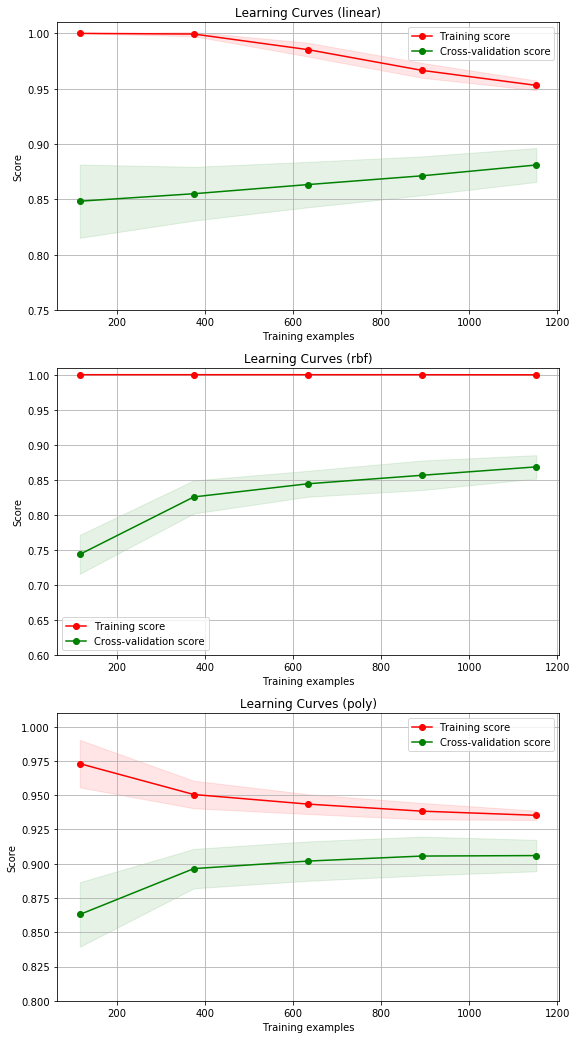

In [38]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
        axes.set_xlabel("Training examples")
        axes.set_ylabel("Score")

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
        axes.grid()
        axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
        axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
        axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training score")
        axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation score")
        axes.legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

    return plt


# fig, axes = plt.subplots(1,1, figsize=(10, 5))

plt.figure(figsize=(9,18))

# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

# Cross validation with more iterations to get smoother mean test and train score curves, each time with 20% data randomly selected as a validation set.
# SVC is more expensive so we do a lower number of CV iterations. This is becasue you have to keep the kernel matrix around, and the projection into this "infinite" higher dimensional space where the data becomes linearly separable is more expensive as well during prediction. Furthermore, you have more hyperparameters to tune, so model selection is more expensive.
# cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

# plot_learning_curve(estimator, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)
axes = plt.subplot(311)
title = r"Learning Curves (linear)"
plot_learning_curve(lin_SVC, title, te_X, te_Y, axes=axes, ylim=(0.75, 1.01), cv=cv, n_jobs=-1)

axes = plt.subplot(312)
title = r"Learning Curves (rbf)"
plot_learning_curve(rbf_SVC, title, te_X, te_Y, axes=axes, ylim=(0.6, 1.01), cv=cv, n_jobs=-1)

axes = plt.subplot(313)
title = r"Learning Curves (poly)"
plot_learning_curve(poly_SVC, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)


plt.show()

[[460  29]
 [ 54 427]]

Confusion matrix


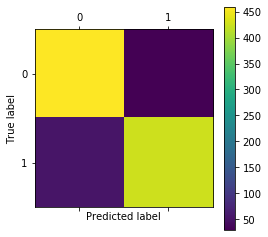

[[0.4742268  0.02989691]
 [0.0556701  0.44020619]]

Confusion matrix(normalised)


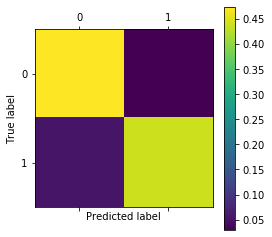

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       489
         1.0       0.94      0.89      0.91       481

    accuracy                           0.91       970
   macro avg       0.92      0.91      0.91       970
weighted avg       0.92      0.91      0.91       970

Accuracy achieved: 0.9144329896907216 ♡♡♡


In [23]:
# optimised_lin = svm.SVC(kernel = 'linear', C = linSVC_param['C'])
# optimised_lin.fit(tr_X, tr_Y)
# op_lin_results = lin_SVC.predict(te_X)
op_lin_results = lin_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_lin_results)
cm = confusion_matrix(te_B, op_lin_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_lin_results, normalize='all')
cm2 = confusion_matrix(te_B, op_lin_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion matrix(normalised)')
plt.show()


print(classification_report(te_B, op_lin_results))
print('Accuracy achieved:', accuracy_score(te_B, op_lin_results), '\u2661''\u2661''\u2661')

[[440  49]
 [ 59 422]]

Confusion matrix


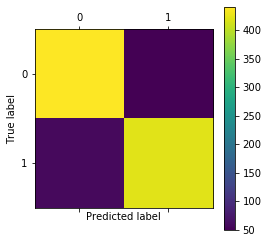

[[0.45360825 0.05051546]
 [0.06082474 0.43505155]]

Confusion matrix(normalised)


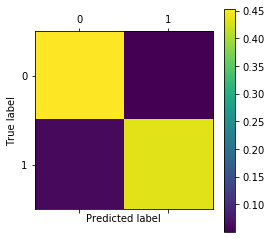

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       489
         1.0       0.90      0.88      0.89       481

    accuracy                           0.89       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.89      0.89      0.89       970

Accuracy achieved: 0.8886597938144329 ♡♡♡


In [24]:
# optimised_rbf = svm.SVC(kernel = 'rbf', gamma = rbfSVC_param['gamma'], C = rbfSVC_param['C'])
# optimised_rbf.fit(tr_X, tr_Y)
# op_rbf_results = rbf_SVC.predict(te_X)
op_rbf_results = rbf_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_rbf_results)
cm = confusion_matrix(te_B, op_rbf_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_rbf_results, normalize='all')
cm2 = confusion_matrix(te_B, op_rbf_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion matrix(normalised)')
plt.show()

print(classification_report(te_B, op_rbf_results))
print('Accuracy achieved:', accuracy_score(te_B, op_rbf_results), '\u2661''\u2661''\u2661')

In [25]:
# import pickle
# with open('my_SVM.pkl','wb') as f:
#     pickle.dump(optimised_poly, f)
# with open('my_SVM.pkl','rb') as f:
#     optimised_poly = pickle.load(f)
# categories = ["0","1"]
# image = "../../dataset_test_AMLS_19-20/celeba_test/img"
# newpred = optimised_poly([image])
# newpred = list(newpred[0])
# print(categories[newpred.index(max(newpred))])

[[460  29]
 [ 47 434]]

Confusion matrix


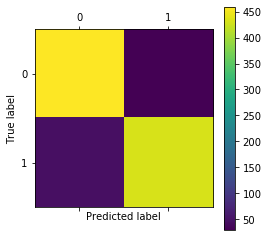

[[0.4742268  0.02989691]
 [0.04845361 0.44742268]]

Confusion matrix(normalised)


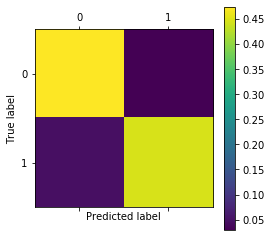

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       489
         1.0       0.94      0.90      0.92       481

    accuracy                           0.92       970
   macro avg       0.92      0.92      0.92       970
weighted avg       0.92      0.92      0.92       970

Accuracy achieved: 0.9216494845360824 ♡♡♡


In [26]:
# optimised_poly = svm.SVC(kernel = 'poly', degree = polySVC_param['degree'], C = polySVC_param['C'])
# optimised_poly.fit(tr_X, tr_Y)
# op_p_results = poly_SVC.predict(te_X)
op_p_results = poly_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_p_results)
cm = confusion_matrix(te_B, op_p_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_p_results, normalize='all')
cm2 = confusion_matrix(te_B, op_p_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion matrix(normalised)')
plt.show()


print(classification_report(te_B, op_p_results))
print('Accuracy achieved:', accuracy_score(te_B, op_p_results), '\u2661''\u2661''\u2661')

In [27]:
# parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10], 'gamma':[0.0001, 0.001, 0.01], 'degree':[1, 2, 3, 4]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(te_X, te_Y)
# GridSearchCV(estimator=SVC(),
#              param_grid={'C':[0.1, 1, 10], 'gamma':[0.0001, 0.001, 0.01], 'degree':[1, 2, 3, 4], 'kernel': ('linear', 'rbf', 'poly')})
# sorted(clf.cv_results_.keys())
# ['mean_fit_time', 'mean_score_time', 'mean_test_score',
#  'param_C', 'param_kernel', 'param_gamma', 'param_degree','params',
#  'rank_test_score', 'split0_test_score',
#  'split2_test_score', 
#  'std_fit_time', 'std_score_time', 'std_test_score']

In [28]:
# from sklearn.metrics import plot_confusion_matrix

In [29]:
# titles_title = [("Confusion matrix, without normalization", None),
#          ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_title:
#     disp = plot_confusion_matrix (poly_svc, te_X, te_Y,
# #                                  display_labels = Y,
# #                                   display_labels
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)

#     print (title)
#     print(disp.confusion_matrix)
    
# plt.show()

#truepositive: predicted positive correctly, truenegative: predicted negative correctly, falsepositive: predicted positive wrongly, falsenegative: predicted negative wrongly
#recall (sensitivity): TP/(TP+FN), precision (specificity): TP/(TP+FP), F-measure:(2*Recall*Precision)/(Recall+Precision)

In [36]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 2315.7013487815857 seconds ---
